In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,Country,2000


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [13]:
c = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
g = c.groupby(['year', 'character']).size().unstack().fillna(0)
sum(g.Superman > g.Batman)

13

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [14]:
c = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
g = c.groupby(['year', 'character']).size().unstack().fillna(0)
sum(g.Batman > g.Superman)

23

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

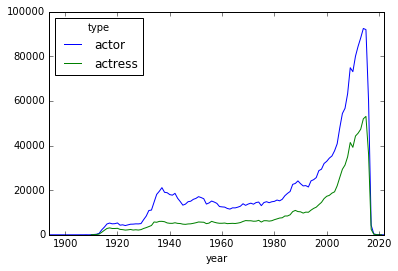

In [57]:
cast.groupby(['type', 'year']).size().unstack(0).plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

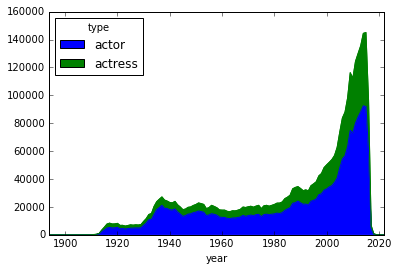

In [58]:
cast.groupby(['type', 'year']).size().unstack(0).plot(kind = 'area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

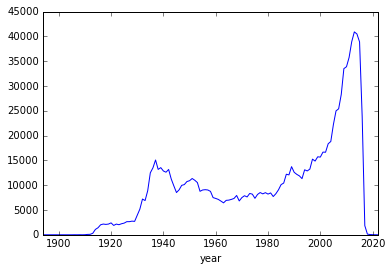

In [24]:
c = cast.groupby(['type', 'year']).size().unstack(0).fillna(0)
diff = c.actor - c.actress
diff.plot()

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

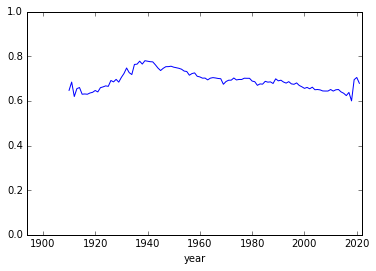

In [62]:
c = cast.groupby(['type', 'year']).size().unstack(0)
frac = c.actor/(c.actor + c.actress)
frac.plot(ylim=[0,1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

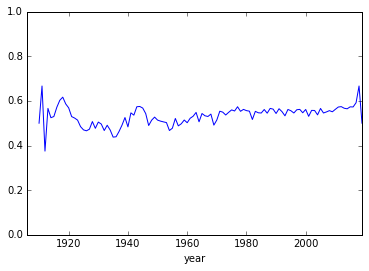

In [64]:
c = cast[cast.n == 2]
c = c.groupby(['type', 'year']).size().unstack(0)
frac = c.actor / (c.actor + c.actress)
frac.plot(ylim=[0,1])

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

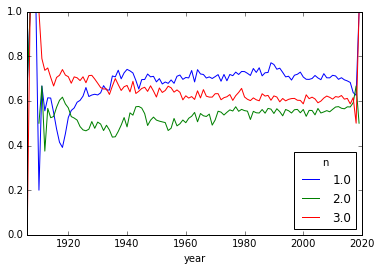

In [54]:
c = cast[(cast.n >= 1) & (cast.n <= 3)]
c = c.groupby(['type', 'year', 'n']).size().unstack(0).fillna(0)
frac = c.actor / (c.actor + c.actress)
frac.unstack().plot()

#c = c.groupby(['type', 'year', 'n']).size().unstack([0,2]).fillna(0)